In [1]:
csvfile = "dataV2_cohortV3.csv"

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(csvfile)

In [4]:
# Mapping the variables to numeric values
mapping_dict = {
    'WELLNESS_malach_pines_burnout_measure_depressed': {
        'Never': 0,
        'Almost never': 1,
        'Rarely': 2,
        'Sometimes': 3,
        'Very Often': 4,
        'Always': 5
    }
}

In [5]:
# Map values and rename

# Create columns for OnlineGames and SocialFriends with 'C' (text) and numeric values
df['OnlineGamesC'] = df['CONNECTION_activities_onlinegames_p3m']

df['WalkWithSomeoneC'] = df['CONNECTION_activities_walk_p3m']

# Create 'Depression' column with numeric values only
df['DepressionC'] = df['WELLNESS_malach_pines_burnout_measure_depressed']
df['DepressionN'] = df['WELLNESS_malach_pines_burnout_measure_depressed'].map(mapping_dict['WELLNESS_malach_pines_burnout_measure_depressed'])



# Drop the original columns from df
keep_cols = ['OnlineGamesC', 'WalkWithSomeoneC', 'DepressionC', 'DepressionN']
df = df[keep_cols]

In [6]:
# Drop NA
df = df.dropna()

In [7]:
# Reorder the categories for OnlineGamesC to make "Not in the past three months" the reference category
df['OnlineGamesC'] = pd.Categorical(df['OnlineGamesC'],
                                           categories=['Not in the past three months', 'Less than monthly', 'Monthly', 
                                                       'A few times a month', 'Weekly', 'A few times a week', 
                                                       'Daily or almost daily'],
                                           ordered=True)

# Reorder the categories for SocialFriendsC to make "No time" the reference category
df['WalkWithSomeoneC'] = pd.Categorical(df['WalkWithSomeoneC'],
                                           categories=['Not in the past three months', 'Less than monthly', 'Monthly', 
                                                       'A few times a month', 'Weekly', 'A few times a week', 
                                                       'Daily or almost daily'],
                                            ordered=True)


In [8]:
df["OnlineGamesB"] = df["OnlineGamesC"] != 'Not in the past three months'
df['WalkWithSomeoneB'] = df['WalkWithSomeoneC'] != 'Not in the past three months'

In [9]:
df

,OnlineGamesC,WalkWithSomeoneC,DepressionC,DepressionN,OnlineGamesB,WalkWithSomeoneB
0,Not in the past three months,Daily or almost daily,Rarely,2.0,False,True
1,Not in the past three months,A few times a week,Almost never,1.0,False,True
2,Not in the past three months,A few times a month,Almost never,1.0,False,True
3,Weekly,Less than monthly,Rarely,2.0,True,True
4,Weekly,Monthly,Almost never,1.0,True,True
...,...,...,...,...,...,...
844,Not in the past three months,Less than monthly,Always,5.0,False,True
845,Not in the past three months,A few times a week,Very Often,4.0,False,True
846,Not in the past three months,A few times a week,Always,5.0,False,True
847,Not in the past three months,A few times a week,Sometimes,3.0,False,True


In [10]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(test_df)

(553, 139)

In [11]:
# Fit the OLS model using categorical values (OnlineGamesC and SocialFriendsC)
ols_model_c = smf.ols("DepressionN ~ C(OnlineGamesC) + C(WalkWithSomeoneC)", data=train_df)

fitted_ols_model_c = ols_model_c.fit()
# Display the regression results
fitted_ols_model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.651
Date:                Fri, 22 Nov 2024   Prob (F-statistic):            0.00184
Time:                        17:34:39   Log-Likelihood:                -928.99
No. Observations:                 553   AIC:                             1884.
Df Residuals:                     540   BIC:                             1940.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.6370      0.121     21.707      0.000       2.398       2.876
C(OnlineGamesC)[T.Less than monthly]             0.0904      0.238      0.380      0.704      -0.377       0.558
C(OnlineGamesC)[T.Monthly]                      -0.3363      0.502     -0.670      0.503      -1.323       0.650
C(OnlineGamesC)[T.A few times a month]           0.4363      0.263      1.662      0.097      -0.079       0.952
C(OnlineGamesC)[T.Weekly]                        0.4583      0.295      1.555      0.120      -0.120       1.037
C(OnlineGamesC)[T.A few times a week]            0.2776      0.336      0.825      0.409      -0.383       0.938
C(OnlineGamesC)[T.Daily or almost daily]         0.0197      0.216      0.091      0.928      -0.405       0.444
C(WalkWithSomeoneC)[T.Less than monthly]         0.0730      0.191      0.382      0.702      -0.302       0.448
C(WalkWithSomeoneC)[T.Monthly]                  -0.3056      0.223     -1.373      0.170      -0.743       0.132
C(WalkWithSomeoneC)[T.A few times a month]      -0.2102      0.182     -1.153      0.249      -0.568       0.148
C(WalkWithSomeoneC)[T.Weekly]                   -0.6372      0.185     -3.438      0.001      -1.001      -0.273
C(WalkWithSomeoneC)[T.A few times a week]       -0.4948      0.187     -2.642      0.008      -0.863      -0.127
C(WalkWithSomeoneC)[T.Daily or almost daily]    -0.8150      0.235     -3.465      0.001      -1.277      -0.353
==============================================================================
Omnibus:                       13.195   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.690
Skew:                          -0.099   Prob(JB):                       0.0214
Kurtosis:                       2.457   Cond. No.                         9.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Fit the OLS model using categorical values (OnlineGamesB and SocialFriendsC)
# Binary values for online games
ols_model_b = smf.ols("DepressionN ~ C(OnlineGamesB) + C(WalkWithSomeoneB)", data=train_df)

fitted_ols_model_b = ols_model_b.fit()

# Display the regression results
fitted_ols_model_b.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.918
Date:                Fri, 22 Nov 2024   Prob (F-statistic):            0.00764
Time:                        17:34:39   Log-Likelihood:                -939.92
No. Observations:                 553   AIC:                             1886.
Df Residuals:                     550   BIC:                             1899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.6224      0.122     21.468      0.000       2.382       2.862
C(OnlineGamesB)[T.True]         0.2193      0.128      1.712      0.088      -0.032       0.471
C(WalkWithSomeoneB)[T.True]    -0.3611      0.135     -2.681      0.008      -0.626      -0.097
==============================================================================
Omnibus:                       14.254   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.120
Skew:                          -0.102   Prob(JB):                       0.0173
Kurtosis:                       2.442   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
clf = DecisionTreeClassifier(max_depth=4, random_state=10)

y_train = train_df['DepressionC']
X_train = pd.get_dummies(train_df[['OnlineGamesC', 'WalkWithSomeoneC', 'OnlineGamesB', 'WalkWithSomeoneB']])

y_test = test_df['DepressionC']
X_test = pd.get_dummies(test_df[['OnlineGamesC', 'WalkWithSomeoneC', 'OnlineGamesB', 'WalkWithSomeoneB']])

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [15]:
fig, ax = plt.subplots(figsize=(100, 100))
plot_tree(clf, ax=ax, fontsize=22, feature_names=X_train.columns, class_names=clf.classes_)
plt.show()

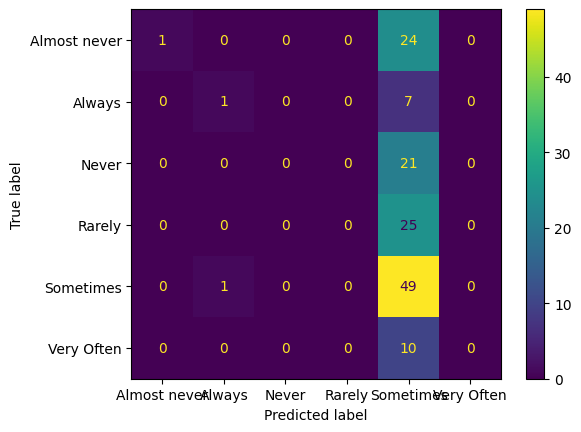

In [16]:
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
cm = cm_display.confusion_matrix

In [17]:
y_pred = clf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# sensitivity = recall_score(y_test, y_pred, average='macro')
# specificity = recall_score(y_test, y_pred, pos_label='Almost never', average='macro')
# precision = precision_score(y_test, y_pred, average='macro')

In [18]:
# print(f"accuracy: {accuracy}")
# print(f"sensitivity: {sensitivity}")
# print(f"specificity: {specificity}")
# print(f"precision: {precision}")